# Lab 7: Random Forest Classifier



## Importing the required libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df = pd.read_csv('heart.csv')
# if rows >1000 training testing = 70-30
# else 80-20

In [ ]:
df.head()    #PSW

,age,sex,BP,cholestrol,heart disease
0,70,1,130,322,1
1,67,0,115,564,0
2,57,1,124,261,1
3,64,1,128,263,0
4,74,0,120,269,0


In [ ]:
df.shape

(270, 5)

In [ ]:
df.columns          =

Index(['age', 'sex', 'BP', 'cholestrol', 'heart disease'], dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   age            270 non-null    int64
 1   sex            270 non-null    int64
 2   BP             270 non-null    int64
 3   cholestrol     270 non-null    int64
 4   heart disease  270 non-null    int64
dtypes: int64(5)
memory usage: 10.7 KB


In [ ]:
df.describe()

,age,sex,BP,cholestrol,heart disease
count,270.000000,270.000000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,131.344444,249.659259,0.444444
std,9.109067,0.468195,17.861608,51.686237,0.497827
min,29.000000,0.000000,94.000000,126.000000,0.000000
25%,48.000000,0.000000,120.000000,213.000000,0.000000
50%,55.000000,1.000000,130.000000,245.000000,0.000000
75%,61.000000,1.000000,140.000000,280.000000,1.000000
max,77.000000,1.000000,200.000000,564.000000,1.000000


## Putting Feature Variable to X and Target variable to y.


In [ ]:
# Putting feature variable to X
X = df.drop('heart disease',axis=1)
# Putting response variable to y
y = df['heart disease']

## Train-Test-Split is performed


In [ ]:
# now lets split the data into train and test
from sklearn.model_selection import train_test_split
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)
X_train.shape, X_test.shape

((189, 4), (81, 4))

**Create the Classifier Model**

# Let’s import RandomForestClassifier and fit the data.


In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5,
                                       n_estimators=100, oob_score=True)
#%%time
classifier_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_jobs=-1, oob_score=True, random_state=42)

In [ ]:
# checking the oob score
# oob score should be greater than 0.5
classifier_rf.oob_score_

0.656084656084656

## Let’s do hyperparameter tuning for Random Forest using GridSearchCV and fit the data.



In [ ]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10,25,30,50,100,200]
}
from sklearn.model_selection import GridSearchCV
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")
#%%time
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 180 candidates, totalling 720 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 30, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [ ]:
grid_search.best_score_

0.6985815602836879

In [ ]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=5, min_samples_leaf=10, n_estimators=10,
                       n_jobs=-1, random_state=42)

In [ ]:
#rf_best.estimators_[9]

## Now, let’s visualize

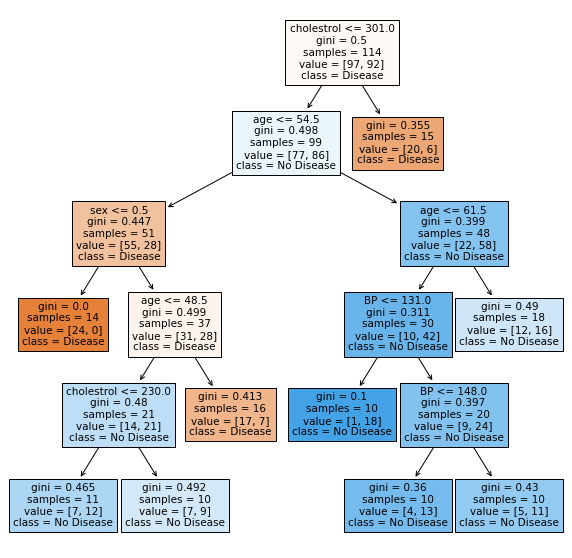

In [ ]:
# Plotting 5th no. of tree
from sklearn.tree import plot_tree
plt.figure(figsize=(10,10))
plot_tree(rf_best.estimators_[5], feature_names = X.columns,class_names=['Disease', "No Disease"],filled=True);


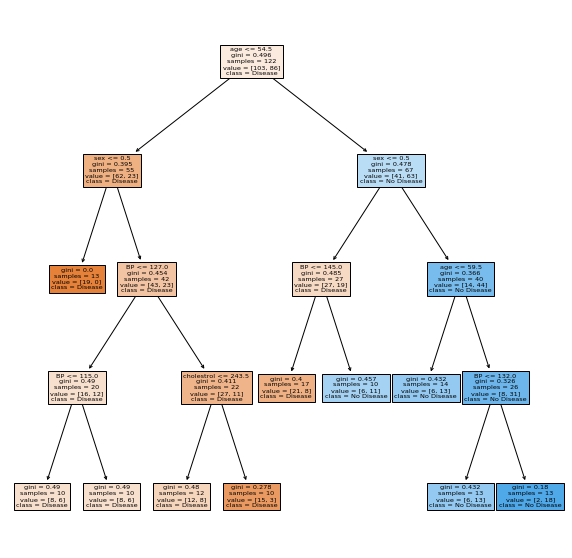

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize=(10,10))
plot_tree(rf_best.estimators_[7], feature_names = X.columns,class_names=['Disease', "No Disease"],filled=True);

### The trees created by estimators_[5] and estimators_[7] are different. Thus we can say that each tree is independent of the other.

### Now let’s sort the data with the help of feature importance

In [ ]:
rf_best.feature_importances_

array([0.46128487, 0.2180848 , 0.13174619, 0.18888413])

In [ ]:
## feature importance

imp_df = pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": rf_best.feature_importances_
})

In [ ]:
imp_df.sort_values(by="Imp", ascending=False)

,Varname,Imp
0,age,0.461285
1,sex,0.218085
3,cholestrol,0.188884
2,BP,0.131746


**Evaluate Our Model**

In [ ]:
ypred = rf_best.predict(X_test)

In [ ]:
print(ypred)

[1 1 1 0 0 1 0 1 1 1 0 1 0 1 1 0 0 0 1 1 1 0 0 0 0 1 0 1 0 0 0 0 1 0 0 1 0
 0 1 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 1 1 1
 1 1 0 1 1 0 0]


In [ ]:
from sklearn.metrics import accuracy_score
print("accuracy of our model: ", accuracy_score(y_test,ypred))

accuracy of our model:  0.6296296296296297


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,ypred)
print(cm)

[[33 16]
 [14 18]]


In [ ]:
from sklearn.metrics import classification_report
cf = classification_report(y_test,ypred)
print(cf)

              precision    recall  f1-score   support

           0       0.70      0.67      0.69        49
           1       0.53      0.56      0.55        32

    accuracy                           0.63        81
   macro avg       0.62      0.62      0.62        81
weighted avg       0.63      0.63      0.63        81



**Predicting New Test Example**

Age=34 , Sex=1, bp=137, cholestrol=525

In [ ]:
print(rf_best.predict([[34,1,137,525]]))

[0]


C:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


## Test your knowledge

In [ ]:
rf_classifier = RandomForestClassifier(random_state=57, n_jobs=-1)
params = {
    'max_features': ['sqrt','log2'],
    'bootstrap':[True,False],
    'max_depth': [10,25,30,None],
    'min_samples_leaf': [1,2,4],
    'min_samples_split': [2,5,10],
    'n_estimators': [1400,1600,1800,2000]
}

grid_search = GridSearchCV(estimator=rf_classifier, param_grid=params,
                           cv = 2, n_jobs=-1, verbose=1, scoring="accuracy")

grid_search.fit(X_train, y_train)

Fitting 2 folds for each of 576 candidates, totalling 1152 fits


GridSearchCV(cv=2, estimator=RandomForestClassifier(n_jobs=-1, random_state=57),
             n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [10, 25, 30, None],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [1400, 1600, 1800, 2000]},
             scoring='accuracy', verbose=1)

In [ ]:
#Accuracy score of Best Model
grid_search.best_score_

0.7089025755879059

In [ ]:
# best estimator
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=10,
                       n_estimators=1400, n_jobs=-1, random_state=57)

In [ ]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 10,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 10,
 'n_estimators': 1400}

In [ ]:
## feature importance

feature_importance_df = pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": rf_best.feature_importances_
})

In [ ]:
feature_importance_df

,Varname,Imp
0,age,0.356242
1,sex,0.137655
2,BP,0.227602
3,cholestrol,0.278500


In [ ]:
tunned_classifier=RandomForestClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=10,
                       n_estimators=1400, n_jobs=-1, random_state=57,bootstrap=True,oob_score=True)
tunned_classifier.fit(X_train,y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=10,
                       n_estimators=1400, n_jobs=-1, oob_score=True,
                       random_state=57)

In [ ]:
tunned_classifier.oob_score_

0.656084656084656

In [ ]:
ypred = tunned_classifier.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,ypred)

0.6666666666666666